#### `Explore AI Academy: Machine Learning-Classification Project`

***

## News Article Classification: End-to-End Machine Learning Project
<br>

<a id="cont"></a>

## Table of Contents
* [1. Project Overview](#chapter1)

    * [1.1 Introduction](#section_1_1)
        * [1.1.1 Problem Statement](#sub_section_1_1_1)
    * [1.2 Objectives](#section_1_2)

* [2. Importing Packages](#chapter2)

* [3. Loading Data](#chapter3)
 
* [4. Text Cleaning](#chapter4)

* [5. Exploratory Data Analysis (EDA)](#chapter5)

* [6. Feature Extraction](#chapter6)

* [7. Model Training](#chapter7) 

* [8. Model Performance](#chapter8)

* [9. Insights & Recommendations](#chapter9)

* [10. Model Deployment](#chapter10)

* [11. Conclusion](#chapter11)


***

### 1. Project Overview

#### 1.1. Introduction
The aim of this project is to analyze a dataset that provides a comprehensive collection of news articles across various domains, including Business, Technology, Sports, Education, and Entertainment. This end-to-end project covers the entire workflow, including data loading, preprocessing, model training, evaluation, and final deployment. The app will allow users to input new articles and receive category predictions, demonstrating the model's practical utility. Hosting the model in a Streamlit app online illustrates its real-world application and value.


#### 1.1.1. Problem Statement
The goal of this project is to build a model that can accurately classify news articles into predefined categories. Given the increasing volume of online content, a reliable automatic classification system can save significant time and effort for both content creators and readers. This project aims to develop and deploy such a system using machine learning techniques.
<br>

#### 1.2 Objectives

+ **Data Analysis and Cleaning:**
  + Load and inspect the dataset.
  + Clean and preprocess the data to handle missing values, inconsistencies, and irrelevant features.


+ **Exploratory Data Analysis (EDA):**
    + Understand the distribution and characteristics of the data.
    + Identify patterns and insights to guide feature engineering and model selection.

+ **Model Development:**
    + Train a variety of classification models to identify the best-performing one.
    + Evaluate model performance using appropriate metrics.

+ **Deployment:**
    + Deploy the final model using a Streamlit app.
    + Enable users to input new articles and receive category predictions.

+ **MLOps Integration:**
    + Utilize MLflow to track and manage model experiments.


***

### 2. Importing Packages

Essential libraries for data loading, manipulation, analysis, visualization, and predictive modeling are imported to facilitate the project's objectives.

In [1]:
# Libraries for data loading, manipulation, and analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import plotly.express as px

#Libraries for text cleaniing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

# Displays output inline
%matplotlib inline

# Libraries for handling warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khulu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\khulu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


***

### 3. Loading Data


The dataset is loaded into DataFrames for both training and testing data.


In [2]:
# Load the training and testing data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display first few rows of the training data
print("Training Data:")
train_data.head(2)


Training Data:


,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business


In [3]:
# Display first few rows of the test data
print("\nTest Data:")
test_data.head(2)


Test Data:


,headlines,description,content,url,category
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: The SBI Clerk prelims ...,SBI Clerk Prelims Exam: The State Bank of Indi...,https://indianexpress.com/article/education/sb...,education


In [4]:
# Make a copy of the dataframes
train_data_copy = train_data.copy()
test_data_copy = test_data.copy()

<div class="alert alert-block alert-danger">
To prevent any major unnecessary changes occurring to the original data, <b>we created a copy of the dataframes using copy() method and referred the dataframe copies as `train_data.copy()` and `test_data.copy()`</b>
</div>

In [5]:
# Check the shape of the data
print("Training Data Shape:", train_data_copy.shape)
print("Test Data Shape:", test_data_copy.shape)

Training Data Shape: (5520, 5)
Test Data Shape: (2000, 5)


***

### 4. Text Cleaning


Text cleaning involves removing noise, punctuation, capitalizing, tokenizing, stemming and/or lemmatizing, and removing stop words.

In [6]:
print(train_data_copy['category'].unique())

['business' 'sports' 'entertainment' 'education' 'technology']


#### 4.1. Stemming

In [7]:
stemmed_train_data = train_data_copy.copy()
stemmed_test_data = test_data_copy.copy()

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Function to clean text
def clean_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A).lower()
    # Tokenize text
    tokens = text.split()
    # Remove stop words
    toLkens = [token for token in tokens if token not in stop_words]
    # Stem or lemmatize
    tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(tokens)

# Apply text cleaning to the dataset
stemmed_train_data['clean_content'] = stemmed_train_data['content'].apply(clean_text)
stemmed_test_data['clean_content'] = stemmed_test_data['content'].apply(clean_text)


##### Top Words per Category after Stemming
Identify the top words in each category using TF-IDF in the training dataset.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize text data
tfidf = TfidfVectorizer(stop_words='english', max_features=100)
X = tfidf.fit_transform(stemmed_train_data['clean_content'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

# Add category column for grouping
tfidf_df['category'] = stemmed_train_data['category'].values

#Get unique categories
categories = stemmed_train_data['category'].unique()

# Calculate mean TF-IDF score per word for each category
tfidf_means = tfidf_df.groupby('category').mean()

# Display top words per category
for category in categories:
    print(f"Top words for category: {category}")
    print(tfidf_means.loc[category].sort_values(ascending=False).head(10))
    print("\n")


Top words for category: business
cent        0.192854
said        0.155481
rs          0.139235
india       0.113448
bank        0.110480
subscrib    0.101162
crore       0.095860
market      0.089468
advertis    0.088660
compani     0.085354
Name: business, dtype: float64


Top words for category: sports
hi       0.201001
wa       0.165437
team     0.135837
play     0.130446
india    0.130185
test     0.122471
game     0.118803
said     0.103864
world    0.097244
ha       0.093225
Name: sports, dtype: float64


Top words for category: entertainment
film         0.255742
latest       0.190094
news         0.181116
hi           0.180395
updat        0.179678
actor        0.155956
wa           0.136594
bollywood    0.120142
entertain    0.105751
regist       0.100844
Name: entertainment, dtype: float64


Top words for category: education
student     0.168235
exam        0.131460
univers     0.121414
candid      0.106309
institut    0.102745
educ        0.092025
thi         0.090611
test 

#### 4.2. Lemmatization

Let us replace stemming with lemmatization, we'll adjust the clean_text function to use the WordNetLemmatizer instead of the PorterStemmer.
Lemmatization: preserves the meaning of words, which is important for understanding the context in news articles

In [10]:
lemmatized_train_data = train_data_copy.copy()
lemmatized_test_data = test_data_copy.copy()

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean text
def clean_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A).lower()
    # Tokenize text
    tokens = text.split()
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Apply text cleaning to the dataset
lemmatized_train_data['clean_content'] = lemmatized_train_data['content'].apply(clean_text)
lemmatized_test_data['clean_content'] = lemmatized_test_data['content'].apply(clean_text)


##### Top Words per Category after lemmatization

Identify the top words in each category using TF-IDF in the training dataset.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize text data
tfidf = TfidfVectorizer(stop_words='english', max_features=100)
X = tfidf.fit_transform(lemmatized_train_data['content'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

# Add category column for grouping
tfidf_df['category'] = lemmatized_train_data['category'].values

# Calculate mean TF-IDF score per word for each category
tfidf_means = tfidf_df.groupby('category').mean()

# Display top words per category
for category in categories:
    print(f"Top words for category: {category}")
    print(tfidf_means.loc[category].sort_values(ascending=False).head(10))
    print("\n")


Top words for category: business
cent             0.197420
said             0.167964
rs               0.151499
india            0.122273
crore            0.099167
bank             0.096933
advertisement    0.095386
subscribe        0.076022
year             0.072713
month            0.072203
Name: business, dtype: float64


Top words for category: sports
india     0.158386
team      0.147653
said      0.141952
test      0.140529
world     0.119502
time      0.098626
need      0.087126
second    0.086739
year      0.086226
indian    0.073973
Name: sports, dtype: float64


Top words for category: entertainment
film             0.247485
latest           0.212882
updates          0.212110
news             0.201841
actor            0.168573
bollywood        0.134379
entertainment    0.116783
register         0.114831
headlines        0.111680
express          0.104797
Name: entertainment, dtype: float64


Top words for category: education
students      0.165365
2023          0.130168
univer

We will use results from lemmatization as it produced better results.
Notice how the word 'said' is included amongst the top words in the business and sports categories.

In [12]:
# Apply lemmatized text cleaning to the dataset
train_data_copy['clean_content'] = lemmatized_train_data['content'].apply(clean_text)
test_data_copy['clean_content'] = lemmatized_test_data['content'].apply(clean_text)

#### 4.3. Customization of stop words

Let's customize the stop word list to include news-specific stop words such as "said", we can extend the existing NLTK stop words list. We'll add common words that are typically not informative in the context of news articles.

In [13]:
# Customize the stop words list for news-specific stop words
stop_words = set(stopwords.words('english'))
news_specific_stop_words = {"said", "mr", "mrs", "one", "two", "new", "first", "last", "also"}
stop_words_list = list(stop_words.union(news_specific_stop_words))

# Function to clean text
def clean_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A).lower()
    # Tokenize text
    tokens = text.split()
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words_list]
    return ' '.join(tokens)

# Apply text cleaning to the dataset
train_data_copy['clean_content'] = train_data_copy['content'].apply(clean_text)
test_data_copy['clean_content'] = test_data_copy['content'].apply(clean_text)


##### Top Words per Category after customizing stop words

Identify the top words in each category using TF-IDF in the training dataset.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize text data
tfidf = TfidfVectorizer(stop_words= stop_words_list, max_features=100)
X = tfidf.fit_transform(test_data_copy['clean_content'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

# Add category column for grouping
tfidf_df['category'] = test_data_copy['category'].values

# Calculate mean TF-IDF score per word for each category
tfidf_means = tfidf_df.groupby('category').mean()

# Display top words per category
for category in categories:
    print(f"Top words for category: {category}")
    print(tfidf_means.loc[category].sort_values(ascending=False).head(10))
    print("\n")


Top words for category: business
per              0.175714
cent             0.175226
rs               0.164417
crore            0.112949
subscribe        0.098005
advertisement    0.095734
bank             0.087826
india            0.081328
subscriber       0.073395
month            0.072603
Name: business, dtype: float64


Top words for category: sports
india        0.120108
australia    0.117635
team         0.112374
test         0.104247
cup          0.101622
game         0.093817
cricket      0.093790
final        0.089830
world        0.086210
need         0.077666
Name: sports, dtype: float64


Top words for category: entertainment
film             0.221311
latest           0.204548
updates          0.198089
news             0.178430
actor            0.147795
bollywood        0.122285
register         0.114823
stories          0.107221
entertainment    0.106942
along            0.104541
Name: entertainment, dtype: float64


Top words for category: education
students      0.221030

***

### 5. Exploratory Data Analysis (EDA)


#### Visualizing Data Distribution

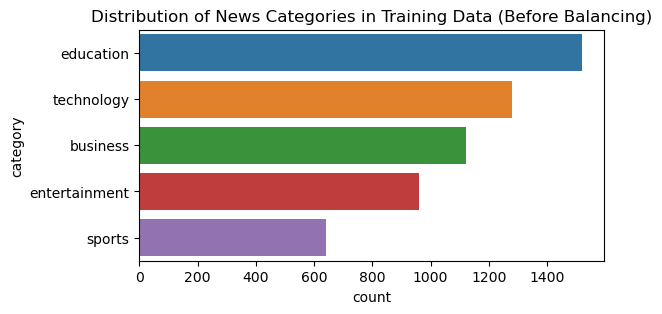

In [15]:
# Distribution of categories in training data before balancing
plt.figure(figsize=(6, 3))
sns.countplot(y='category', data=train_data_copy, order=train_data_copy['category'].value_counts().index)
plt.title('Distribution of News Categories in Training Data (Before Balancing)')
plt.show()

In [16]:
# Display current class counts
train_data_copy.category.value_counts()

category
education        1520
technology       1280
business         1120
entertainment     960
sports            640
Name: count, dtype: int64

###### Balancing our train_data_copy()

In [17]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = train_data_copy[train_data_copy.category == 'business']
df_minority_sports = train_data_copy[train_data_copy.category == 'sports']
df_minority_entertainment = train_data_copy[train_data_copy.category == 'entertainment']
df_minority_education = train_data_copy[train_data_copy.category == 'education']
df_minority_technology = train_data_copy[train_data_copy.category == 'technology']

# Upsample minority class
df_minority_sports_upsampled = resample(df_minority_sports, 
                                         replace=True,     # sample with replacement
                                         n_samples=len(df_majority),    # to match majority class
                                         random_state=123) # reproducible results

df_minority_entertainment_upsampled = resample(df_minority_entertainment, 
                                                replace=True, 
                                                n_samples=len(df_majority), 
                                                random_state=123)

df_minority_education_upsampled = resample(df_minority_education, 
                                            replace=True, 
                                            n_samples=len(df_majority), 
                                            random_state=123)

df_minority_technology_upsampled = resample(df_minority_technology, 
                                             replace=True, 
                                             n_samples=len(df_majority), 
                                             random_state=123)

# Combine majority class with upsampled minority class
train_data_balanced = pd.concat([df_majority, 
                                 df_minority_sports_upsampled, 
                                 df_minority_entertainment_upsampled, 
                                 df_minority_education_upsampled,
                                 df_minority_technology_upsampled])

# Display new class counts
train_data_balanced.category.value_counts()

category
business         1120
sports           1120
entertainment    1120
education        1120
technology       1120
Name: count, dtype: int64

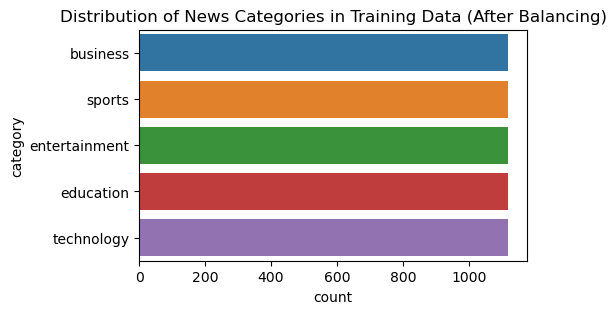

In [18]:
# Distribution of categories in training data after balancing
plt.figure(figsize=(5, 3))
sns.countplot(y='category', data=train_data_balanced, order=train_data_balanced['category'].value_counts().index)
plt.title('Distribution of News Categories in Training Data (After Balancing)')
plt.show()

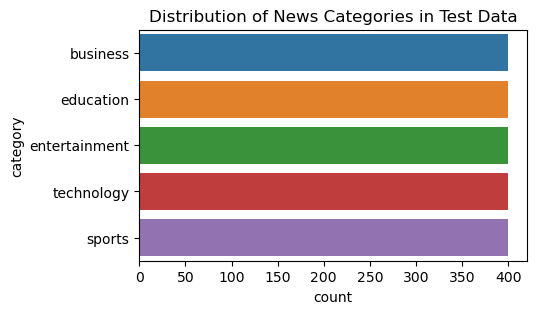

In [19]:
# Distribution of categories in test data
plt.figure(figsize=(5, 3))
sns.countplot(y='category', data=test_data_copy, order=test_data_copy['category'].value_counts().index)
plt.title('Distribution of News Categories in Test Data')
plt.show()

#### Word Cloud for Categories

Create word clouds to visualize the most common words in each category in the training dataset.

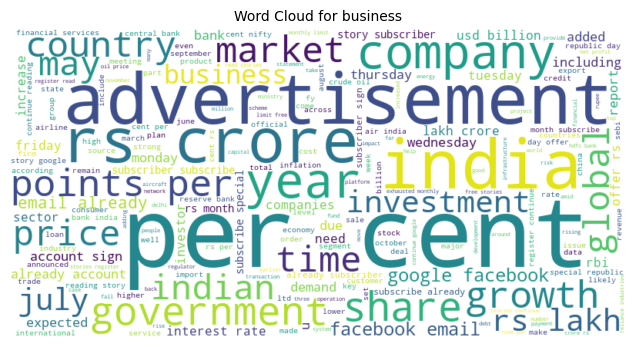

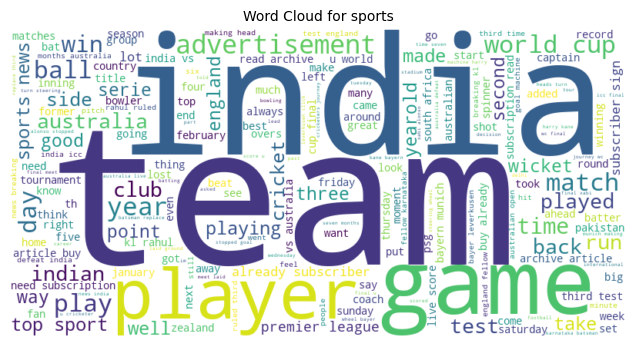

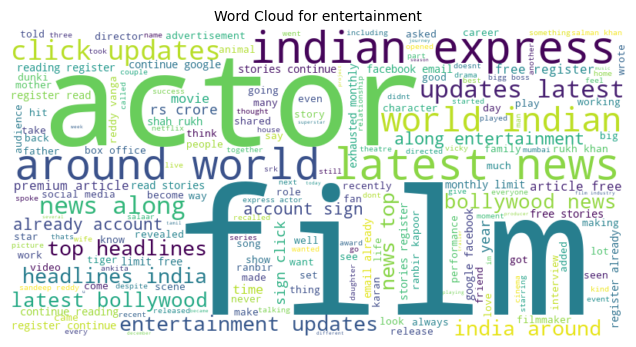

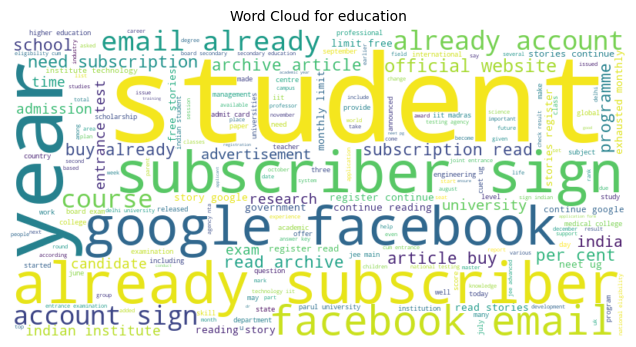

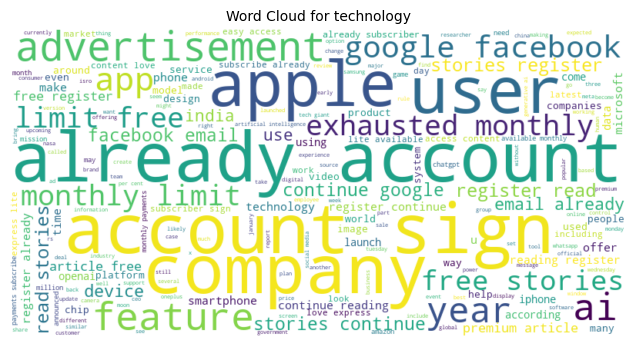

In [20]:
from wordcloud import WordCloud

# Function to plot word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=10)
    plt.axis('off')
    plt.show()

# Plot word clouds for each category in the balanced training data
categories = train_data_copy['category'].unique()
for category in categories:
    text = " ".join(article for article in train_data_copy[train_data_copy['category'] == category]['clean_content'])
    plot_wordcloud(text, f"Word Cloud for {category}")


"India" and "Australia" appearing in top words for both Business and Sports categories likely reflects the focus on these countries within the news articles.
These terms could indicate coverage of companies headquartered in India (business) or sports teams/events involving these countries (sports).

***

### 6. Feature Extraction


Using CountVectorizer and TF-IDF vectorization to extract features from the cleaned text data.

#### 6.1 Bag-of-Words Model

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the CountVectorizer
count_vect = CountVectorizer(stop_words='english')

# Fit and transform the cleaned text data
X_train_counts = count_vect.fit_transform(train_data_balanced['clean_content'])
X_test_counts = count_vect.transform(test_data_copy['clean_content'])

# Display the feature names
print("Feature names:", count_vect.get_feature_names_out()[:10])

Feature names: ['00' '000' '01' '02' '022' '023' '036' '04' '05' '050']


In [22]:
# Display the total number of features
print("Total number of features:", len(count_vect.get_feature_names_out()))

Total number of features: 35185


#### 6.2 TF-IDF Vectorization

In [23]:
# Extract features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(train_data_balanced['clean_content'])
X_test_tfidf = vectorizer.transform(test_data_copy['clean_content'])

# Target variable
y_train = train_data_balanced['category']
y_test = test_data_copy['category']


***

### 7. Model training

Training a Naive Bayes classifier on the extracted features.

In [24]:
# Split the training data for validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(kernel='linear'),
    "Naive Bayes": MultinomialNB(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

# Train and validate models
model_performance = {}
for model_name, model in models.items():
    model.fit(X_train_split, y_train_split)
    y_val_pred = model.predict(X_val_split)
    val_accuracy = accuracy_score(y_val_split, y_val_pred)
    model_performance[model_name] = val_accuracy
    print(f"{model_name} Validation Accuracy: {val_accuracy}")


Logistic Regression Validation Accuracy: 0.9919642857142857
Decision Tree Validation Accuracy: 0.9446428571428571
Random Forest Validation Accuracy: 0.9848214285714286
SVM Validation Accuracy: 0.9928571428571429
Naive Bayes Validation Accuracy: 0.9892857142857143
Neural Network Validation Accuracy: 0.9928571428571429


***

### 9. Model Performance

Evaluate the model performance on the test dataset.

In [25]:
# Evaluate models on test data
test_performance = {}
for model_name, model in models.items():
    y_test_pred = model.predict(X_test_tfidf)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_performance[model_name] = test_accuracy
    print(f"{model_name} Test Accuracy: {test_accuracy}")
    print(f"\nClassification Report for {model_name}:\n", classification_report(y_test, y_test_pred))


Logistic Regression Test Accuracy: 0.97

Classification Report for Logistic Regression:
                precision    recall  f1-score   support

     business       0.96      0.96      0.96       400
    education       0.99      0.98      0.99       400
entertainment       0.99      0.97      0.98       400
       sports       0.98      0.98      0.98       400
   technology       0.92      0.96      0.94       400

     accuracy                           0.97      2000
    macro avg       0.97      0.97      0.97      2000
 weighted avg       0.97      0.97      0.97      2000

Decision Tree Test Accuracy: 0.8575

Classification Report for Decision Tree:
                precision    recall  f1-score   support

     business       0.81      0.85      0.83       400
    education       0.92      0.90      0.91       400
entertainment       0.94      0.90      0.92       400
       sports       0.85      0.86      0.85       400
   technology       0.77      0.78      0.78       400

  

***

### 9. Insights & Recommendations

**Insights:**
 - Logistic Regression, SVM, Naive Bayes, and Neural Networks all showed high accuracy on both validation and test sets, indicating their robustness and generalizability.
 - Random Forest also performed well, though slightly behind the aforementioned models.
 - Decision Trees provided reasonable accuracy but were outperformed by ensemble methods like Random Forest and more complex models like SVM and Neural Networks.

**Recommendations:**
 - Neural Networks and Naive Bayes are recommended for their high accuracy and consistent performance across all categories.
 - SVM and Logistic Regression are also strong contenders due to their robustness and generalizability.
 - Random Forest is a good option for its balance between simplicity and performance.
 - Further improvements can be made by hyperparameter tuning for SVM and Neural Network models.
 - Collect more data to enhance model robustness, especially for underrepresented categories.
 - Implement cross-validation to ensure the model's stability across different data splits.

The project successfully demonstrates the development of an end-to-end machine learning pipeline for news article classification. Multiple models were trained and evaluated, with Neural Networks showing the best performance. Deploying this model in a Streamlit app can provide real-time predictions.

***

### 10. Model Deployment

#### 10.1. Save the Trained Model

In [26]:
import joblib

# Train the Neural Network model
best_model = MLPClassifier(max_iter=1000)
best_model.fit(X_train_tfidf, y_train)

# Save the trained model
joblib.dump(best_model, 'neural_network_model.pkl')

# Save the TfidfVectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

#### 10.2. Create the Streamlit App

In [27]:
import streamlit as st
import joblib
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load the trained model and TfidfVectorizer
model = joblib.load('neural_network_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Customize the stop words list for news-specific stop words
stop_words = set(stopwords.words('english'))
news_specific_stop_words = {"said", "mr", "mrs", "one", "two", "new", "first", "last", "also"}
stop_words_list = list(stop_words.union(news_specific_stop_words))

lemmatizer = WordNetLemmatizer()

# Function to clean text
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I | re.A).lower()
    tokens = text.split()
    tokens = [token for token in tokens if token not in stop_words_list]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Streamlit app
st.title("News Article Classification")
st.write("Enter a news article to classify its category.")

# Input text from user
input_text = st.text_area("News Article Text", "")

if st.button("Classify"):
    if input_text:
        # Clean and vectorize the input text
        cleaned_text = clean_text(input_text)
        vectorized_text = vectorizer.transform([cleaned_text])

        # Predict the category
        prediction = model.predict(vectorized_text)

        # Display the result
        st.write(f"The predicted category is: {prediction[0]}")
    else:
        st.write("Please enter some text to classify.")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khulu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\khulu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
2024-07-03 00:03:30.825 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-07-03 00:03:30.834 Session state does not function when running a script without `streamlit run`


#### 10.3. Run the Streamlit App

**Using the Conda Shell Prompt**
1. Open Conda Shell Prompt
 - Open the Anaconda Prompt from your Start menu or Anaconda Navigator.

2. Activate Your Conda Environment
 - Activate the conda environment where you want to run Streamlit:
        run: conda activate your_environment_name
        Replace your_environment_name with the name of your conda environment.

3. Navigate to Your Project Directory
 - Use the cd command to navigate to the directory containing your base_app.py file:
        run: cd "C:\Users\khulu\Desktop\Documents\ExploreAI\Natural Language Processing and Classification\Classification_Project_remote\CLassification_project-Team-EG5\DATA"

4. Run Streamlit App
 - Run the Streamlit app:
        streamlit run base_app.py

***

### 11. Conclusion

The project successfully demonstrates the development of an end-to-end machine learning pipeline for news article classification. Multiple models were trained and evaluated, with Neural Networks showing the best performance. Deploying this model in a Streamlit app can provide real-time predictions.

***

### THE END